## ABC Ltd. Employee Performance Analysis - Project

## Used plotly and cufflinks for Visualization, might not work in systems if plotly not installed
- pip install plotly
- pip install cufflinks

In [1]:
# importing Libraries

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

In [2]:
# reading Data
abc = pd.read_excel('data_ABC.xls')
print(abc.shape)
abc.head()

(1200, 28)


,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [3]:
# checking null values
abc.isnull().sum().sum()

0

In [4]:
#checking NaN values
abc.isna().sum().sum()

0

In [5]:
# checking type of the features
abc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
EmpNumber                       1200 non-null object
Age                             1200 non-null int64
Gender                          1200 non-null object
EducationBackground             1200 non-null object
MaritalStatus                   1200 non-null object
EmpDepartment                   1200 non-null object
EmpJobRole                      1200 non-null object
BusinessTravelFrequency         1200 non-null object
DistanceFromHome                1200 non-null int64
EmpEducationLevel               1200 non-null int64
EmpEnvironmentSatisfaction      1200 non-null int64
EmpHourlyRate                   1200 non-null int64
EmpJobInvolvement               1200 non-null int64
EmpJobLevel                     1200 non-null int64
EmpJobSatisfaction              1200 non-null int64
NumCompaniesWorked              1200 non-null int64
OverTime                        1200 non-null object
E

In [6]:
# analysis of numerical features
abc.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


In [7]:
# checking skewness
abc.skew()

Age                             0.384145
DistanceFromHome                0.962956
EmpEducationLevel              -0.250974
EmpEnvironmentSatisfaction     -0.307665
EmpHourlyRate                  -0.035165
EmpJobInvolvement              -0.557846
EmpJobLevel                     1.024053
EmpJobSatisfaction             -0.324276
NumCompaniesWorked              1.048635
EmpLastSalaryHikePercent        0.808654
EmpRelationshipSatisfaction    -0.318563
TotalWorkExperienceInYears      1.086862
TrainingTimesLastYear           0.532073
EmpWorkLifeBalance             -0.539231
ExperienceYearsAtThisCompany    1.789055
ExperienceYearsInCurrentRole    0.888159
YearsSinceLastPromotion         1.974932
YearsWithCurrManager            0.813158
PerformanceRating              -0.070576
dtype: float64

In [8]:
# extracting only numerical columns
abc.columns[abc.dtypes!='object']

Index(['Age', 'DistanceFromHome', 'EmpEducationLevel',
       'EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobInvolvement',
       'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'PerformanceRating'],
      dtype='object')

In [9]:
# storing numerical columns in a variable
num_col = abc.columns[abc.dtypes!='object']

In [10]:
# extracting only important columns in numerical features
imp_num_col = ['Age', 'DistanceFromHome', 'EmpHourlyRate', 'NumCompaniesWorked', 'EmpLastSalaryHikePercent',
               'TotalWorkExperienceInYears', 'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole',
               'PerformanceRating']

In [11]:
# plotting important numerical features using boxplot to check their distribution
abc[imp_num_col].iplot(kind='box')

## insights from the above graph

- The min age is 18 and max age is 60. Most of the employees age lie between 30 to 43.
- The min 'distance from home' to office is 1 and max 'distance from home' to office is 29 (km or mile). Most of the employees come from 2-14 (km or mile).
- The Employee hourly rate range is 48 to 83 for Most employees in the company.
- Employees worked in up to 8 companies, most of the employees worked in up to 2 companies before joining this company.
- Most employees Salary hike is from 12%  to 18% in this company.
- Employees have work experience ranging from 6 to 15 years, where most of them have an average experience of 10 years.
- In this company most of the Employees on average work for up to 5 years.
- Employees have an average experience of 4 years in their roles.
- Most employees on average have performance rating of 3.

In [12]:
# checking categorical columns
cat_cols = abc.columns[abc.dtypes=='object']

In [13]:
# no of different values in categorical features
abc[cat_cols[1:]].nunique()

Gender                      2
EducationBackground         6
MaritalStatus               3
EmpDepartment               6
EmpJobRole                 19
BusinessTravelFrequency     3
OverTime                    2
Attrition                   2
dtype: int64

In [14]:
# displaying only categorical features
abc[cat_cols[1:]].head()

,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
0,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No
1,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No
2,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,Yes,No
3,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,No,No
4,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No


In [15]:
# plot of total no of male and female in the company
abc['Gender'].value_counts().iplot(kind='bar',xTitle='Gender',yTitle='Total No.')

## 1. Department wise performances

In [16]:
# lets find total no of departments
set(abc['EmpDepartment'])

# there are 6 departments in this company

{'Data Science',
 'Development',
 'Finance',
 'Human Resources',
 'Research & Development',
 'Sales'}

In [17]:
# Checking average performance from each department
abc['PerformanceRating'].groupby(abc['EmpDepartment']).mean().sort_values(ascending=False)

EmpDepartment
Development               3.085873
Data Science              3.050000
Human Resources           2.925926
Research & Development    2.921283
Sales                     2.860590
Finance                   2.775510
Name: PerformanceRating, dtype: float64

In [18]:
# plotting average performance of each department
abc['PerformanceRating'].groupby(abc['EmpDepartment']).mean().sort_values(ascending=False).iplot(kind='bar',
                                                                        xTitle='Departments',
                                                                        yTitle ='Performance Rating',
                                                                        title = 'average performance of each department')

In [19]:
# No of Employees in each department
abc['EmpDepartment'].value_counts()

Sales                     373
Development               361
Research & Development    343
Human Resources            54
Finance                    49
Data Science               20
Name: EmpDepartment, dtype: int64

In [20]:
# plot of No of Employees in each department
abc['EmpDepartment'].value_counts().iplot(kind='bar',xTitle='Departments', yTitle ='Total No',
                                          title='No of Employees in each department')

### Biggest department is Sales Department

In [21]:
# list of all different different departments
dept = list(abc['EmpDepartment'].unique())
dept

['Sales',
 'Human Resources',
 'Development',
 'Data Science',
 'Research & Development',
 'Finance']

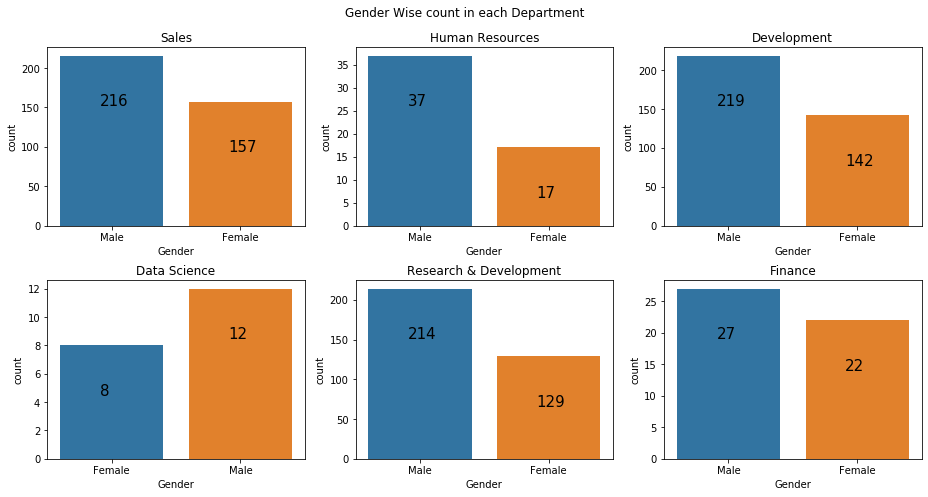

In [22]:
# Gender Wise count in each Department

plt.figure(figsize=(13,7))
a=1
for i in dept:
    plt.suptitle('Gender Wise count in each Department')
    plt.subplot(2,3,a)
    
    ax = sns.countplot('Gender',data=abc[abc['EmpDepartment']==i])
    for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),xytext=(-12, -50),
                    textcoords='offset points',fontsize=15, color='black') # color='dimgrey'
    
    plt.title(i)
    plt.tight_layout()
    plt.subplots_adjust(top=.90)
    a += 1

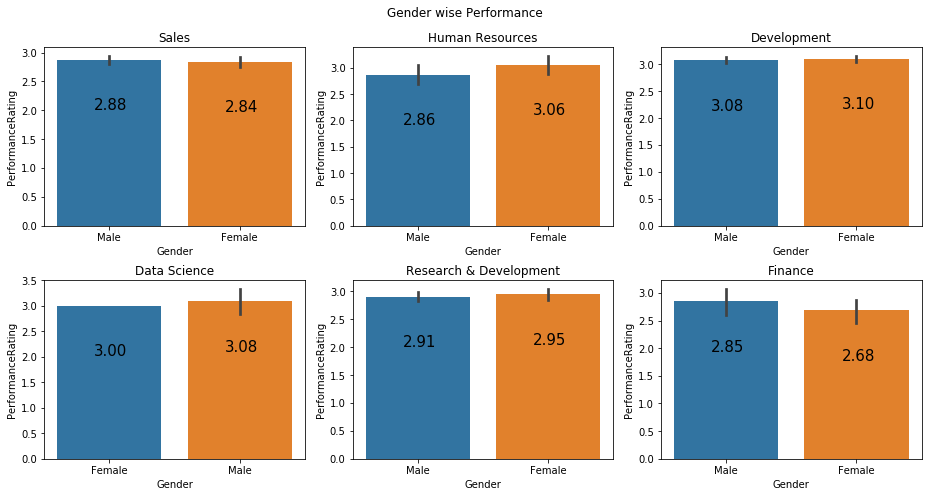

In [23]:
# Gender wise Performance

plt.figure(figsize=(13,7))
a=1
for i in dept:
    plt.suptitle('Gender wise Performance')
    plt.subplot(2,3,a)
    
    ax = sns.barplot('Gender','PerformanceRating',data=abc[abc['EmpDepartment']==i])
    for p in ax.patches:
        ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),xytext=(-15, -50),
                    textcoords='offset points',fontsize=15, color='black') # color='dimgrey'
    
    plt.title(i)
    plt.tight_layout()
    plt.subplots_adjust(top=.90)
    a += 1

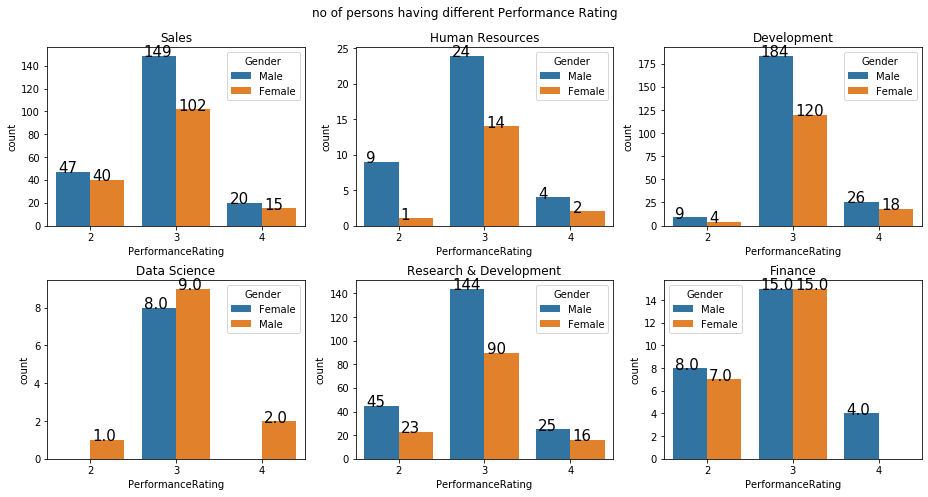

In [24]:
# no of persons having different Performance Rating

plt.figure(figsize=(13,7))
a=1
for i in dept:
    plt.suptitle('no of persons having different Performance Rating')
    plt.subplot(2,3,a)
    
    ax = sns.countplot('PerformanceRating',data=abc[abc['EmpDepartment']==i],hue='Gender')
    for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),xytext=(-15, -1),
                    textcoords='offset points',fontsize=15, color='black') # color='dimgrey'
    
    plt.title(i)
    plt.tight_layout()
    plt.subplots_adjust(top=.90)
    a += 1

## 2. Top 3 Important Factors effecting employee performance

### Method 1 : Using Heatmap

In [25]:
# checking correltion
#abc.corr()

In [26]:
#sorting corelation of 'PerformanceRating' in descending order
#abc.corr()['PerformanceRating'][:-1].sort_values(ascending=False)

In [27]:
#plotting corelation of 'PerformanceRating' in descending order
abc.corr()['PerformanceRating'][:-1].sort_values(ascending=False).iplot(kind='bar',yTitle='Pearson correlation',
                                                                        title='Before Label Encoding')

In [28]:
#plotting corelation of 'PerformanceRating' in descending order (considering only absolute values)
np.abs(abc.corr()['PerformanceRating'][:-1]).sort_values(ascending=False).iplot(kind='bar',yTitle='Pearson correlation',
                                                        title='Before Label Encoding and Considering only absolute value')

## top 3 factors affecting the employee performance are (without Label Encoding)
- **EmpEnvironmentSatisfaction**
- **EmpLastSalaryHikePercent**
- **YearsSinceLastPromotion**

## Label Encoding

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [30]:
# applying label encoding
abc_le = abc.copy()
obj_cols = abc_le.columns[abc_le.dtypes=='object']
for i in obj_cols[1:]:
    abc_le[i] = le.fit_transform(abc_le[i])

In [31]:
#plotting corelation of 'PerformanceRating' in descending order after label encoding
abc_le.corr()['PerformanceRating'][:-1].sort_values(ascending=False).iplot(kind='bar',yTitle='Pearson correlation',
                                                                           title='After Label Encoding')

In [32]:
#plotting corelation of 'PerformanceRating' in descending order after label encoding (considering only absolute values)
np.abs(abc_le.corr()['PerformanceRating'][:-1]).sort_values(ascending=False).iplot(kind='bar',yTitle='Pearson correlation',
                                                        title='After Label Encoding and Considering only absolute value')

## top 3 factors affecting the employee performance are (with Label Encoding)
- **EmpEnvironmentSatisfaction**
- **EmpLastSalaryHikePercent**
- **YearsSinceLastPromotion**

### Method 2 : Using SelectFromModel, SelectKBest from feature_selection library for feature selection

## SelectFromModel Method

 - using **SelectFromModel**

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel, SelectKBest, chi2
sfm = SelectFromModel(RandomForestClassifier(n_estimators = 100))
skb = SelectKBest(score_func=chi2,k=3)

In [34]:
X = abc_le.drop(['EmpNumber','PerformanceRating'],axis=1)
y = abc_le[['PerformanceRating']]

In [35]:
# fitting data on the model
print(sfm.fit(X,y))
print(skb.fit(X,y))

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=False,
                                                 random_state=None, verbose=0,
  

In [36]:
pd.Series(sfm.estimator_.feature_importances_.ravel()*100, index=X.columns).sort_values(ascending=False).head()

EmpLastSalaryHikePercent        21.372981
EmpEnvironmentSatisfaction      20.607043
YearsSinceLastPromotion          9.154786
EmpJobRole                       4.358033
ExperienceYearsInCurrentRole     4.095800
dtype: float64

In [37]:
(pd.Series(sfm.estimator_.feature_importances_.ravel()*100, index=X.columns)
   .nlargest(30)
   .iplot(kind='bar',yTitle='Gini'))

## from the above plot we find that the top 3 features affecting employee performance are:
- **EmpLastSalaryHikePercent**
- **EmpEnvironmentSatisfaction**
- **YearsSinceLastPromotion**

## SelectKBest Method

- using **SelectKBest** with **chi2** score_fucntion

In [38]:
list(zip(X.columns,skb.scores_))

[('Age', 5.170312624354909),
 ('Gender', 0.06450104499370798),
 ('EducationBackground', 0.151940779938956),
 ('MaritalStatus', 1.2320109806024262),
 ('EmpDepartment', 46.787010019079574),
 ('EmpJobRole', 35.896166866525896),
 ('BusinessTravelFrequency', 1.0113636831445438),
 ('DistanceFromHome', 18.650010036720122),
 ('EmpEducationLevel', 0.3140384172539257),
 ('EmpEnvironmentSatisfaction', 110.6913189896083),
 ('EmpHourlyRate', 17.869736265452993),
 ('EmpJobInvolvement', 0.22207574620332415),
 ('EmpJobLevel', 6.270262589245652),
 ('EmpJobSatisfaction', 0.10830985495158582),
 ('NumCompaniesWorked', 1.208358721785177),
 ('OverTime', 7.963529555767487),
 ('EmpLastSalaryHikePercent', 297.1369174894023),
 ('EmpRelationshipSatisfaction', 0.35801431455185206),
 ('TotalWorkExperienceInYears', 41.59303715206247),
 ('TrainingTimesLastYear', 0.4071057598281205),
 ('EmpWorkLifeBalance', 3.8765055678901486),
 ('ExperienceYearsAtThisCompany', 133.60206841599714),
 ('ExperienceYearsInCurrentRole', 1

In [39]:
X.columns[skb.get_support()]

Index(['EmpLastSalaryHikePercent', 'ExperienceYearsAtThisCompany',
       'YearsSinceLastPromotion'],
      dtype='object')

In [40]:
list(zip(X.columns[skb.get_support()],skb.scores_[skb.get_support()]))

[('EmpLastSalaryHikePercent', 297.1369174894023),
 ('ExperienceYearsAtThisCompany', 133.60206841599714),
 ('YearsSinceLastPromotion', 238.0042842298516)]

In [41]:
(pd.Series(skb.scores_, index=X.columns)
   .nlargest(30)
   .iplot(kind='bar',yTitle='Chi2'))

## from the above plot we find that the top 3 features affecting employee performance are:
- **EmpLastSalaryHikePercent**
- **YearsSinceLastPromotion**
- **ExperienceYearsAtThisCompany**

## 3. A trained model which can predict the employee performance based on factors as inputs. This will be used to hire employees

In [42]:
X = abc_le.drop(['EmpNumber','PerformanceRating'],axis=1)
y = abc_le[['PerformanceRating']]

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Following Models are used: 
- **RandomForestClassifier**
- **DecisionTreeClassifier**
- **XGBClassifier**
- **AdaBoostClassifier**
- **GradientBoostingClassifier**

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
rfc = RandomForestClassifier()
dtc = DecisionTreeClassifier()
xgbc = XGBClassifier()
adc = AdaBoostClassifier()
gbc = GradientBoostingClassifier()

In [46]:
classifiers = [rfc, dtc, xgbc, adc, gbc]

In [47]:
for i in classifiers:
    print(i.fit(X_train,y_train),'\n')

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best') 

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1

## Calculating Accuracy Score

In [48]:
Accuracy_Score_train = dict()
Accuracy_Score_test =dict()
for i in classifiers:
    Accuracy_Score_train.setdefault(str(i).split('(')[0],round(100*accuracy_score(y_train,i.predict(X_train)),2))
    Accuracy_Score_test.setdefault(str(i).split('(')[0],round(100*accuracy_score(y_test,i.predict(X_test)),2))

In [49]:
Accuracy_Score_train

{'RandomForestClassifier': 99.4,
 'DecisionTreeClassifier': 100.0,
 'XGBClassifier': 98.21,
 'AdaBoostClassifier': 74.05,
 'GradientBoostingClassifier': 99.76}

In [50]:
Accuracy_Score_test

{'RandomForestClassifier': 93.33,
 'DecisionTreeClassifier': 87.78,
 'XGBClassifier': 93.33,
 'AdaBoostClassifier': 72.22,
 'GradientBoostingClassifier': 93.33}

In [51]:
# summarizing Accuracy scores of Training and Testing Dataset
Accuracy_scores= pd.DataFrame(data={'RandomForestClassifier': [99.4,92.5],'DecisionTreeClassifier': [100.0,89.44],
             'XGBClassifier': [98.21,93.33],
             'AdaBoostClassifier': [74.05,72.22],
             'GradientBoostingClassifier': [99.76,93.33]},index=['Training Data', 'Testing Data']).transpose()
Accuracy_scores

,Training Data,Testing Data
RandomForestClassifier,99.40,92.50
DecisionTreeClassifier,100.00,89.44
XGBClassifier,98.21,93.33
AdaBoostClassifier,74.05,72.22
GradientBoostingClassifier,99.76,93.33


## from the above results we see that **GradientBoostingClassifier** is giving us best results

## Checking Confusion Matrix

In [52]:
Confusion_matrix_train = dict()
Confusion_matrix_test =dict()
for i in classifiers:
    Confusion_matrix_train.setdefault(str(i).split('(')[0],confusion_matrix(y_train,i.predict(X_train)))
    Confusion_matrix_test.setdefault(str(i).split('(')[0],confusion_matrix(y_test,i.predict(X_test)))

In [53]:
for i in Confusion_matrix_train.keys():
    print(i,'\n\n','Training Data','\n\n',Confusion_matrix_train[i],'\n\n','Test Data','\n\n',Confusion_matrix_test[i],'\n')

RandomForestClassifier 

 Training Data 

 [[141   1   0]
 [  4 594   0]
 [  0   0 100]] 

 Test Data 

 [[ 43   9   0]
 [  7 268   1]
 [  1   6  25]] 

DecisionTreeClassifier 

 Training Data 

 [[142   0   0]
 [  0 598   0]
 [  0   0 100]] 

 Test Data 

 [[ 39  12   1]
 [ 14 253   9]
 [  1   7  24]] 

XGBClassifier 

 Training Data 

 [[141   1   0]
 [ 12 586   0]
 [  0   2  98]] 

 Test Data 

 [[ 45   7   0]
 [  8 265   3]
 [  1   5  26]] 

AdaBoostClassifier 

 Training Data 

 [[111  31   0]
 [ 30 441 127]
 [  0  30  70]] 

 Test Data 

 [[ 42  10   0]
 [ 16 201  59]
 [  1  14  17]] 

GradientBoostingClassifier 

 Training Data 

 [[142   0   0]
 [  2 596   0]
 [  0   0 100]] 

 Test Data 

 [[ 44   8   0]
 [  7 266   3]
 [  1   5  26]] 



## Checking Classification Report

In [54]:
Class_report_train = dict()
Class_report_test =dict()
for i in classifiers:
    Class_report_train.setdefault(str(i).split('(')[0],classification_report(y_train,i.predict(X_train)))
    Class_report_test.setdefault(str(i).split('(')[0],classification_report(y_test,i.predict(X_test)))

In [55]:
for i in Class_report_train.keys():
    print(i,'\n\n','Training Data','\n\n',Class_report_train[i],'\n\n','Test Data','\n\n',Class_report_test[i],'\n')

RandomForestClassifier 

 Training Data 

               precision    recall  f1-score   support

           2       0.97      0.99      0.98       142
           3       1.00      0.99      1.00       598
           4       1.00      1.00      1.00       100

    accuracy                           0.99       840
   macro avg       0.99      1.00      0.99       840
weighted avg       0.99      0.99      0.99       840
 

 Test Data 

               precision    recall  f1-score   support

           2       0.84      0.83      0.83        52
           3       0.95      0.97      0.96       276
           4       0.96      0.78      0.86        32

    accuracy                           0.93       360
   macro avg       0.92      0.86      0.89       360
weighted avg       0.93      0.93      0.93       360
 

DecisionTreeClassifier 

 Training Data 

               precision    recall  f1-score   support

           2       1.00      1.00      1.00       142
           3       1.00  

## 4. Recommendations to improve the employee performance based on insights from analysis.
### Following Recommendations are made based on the above analysis**

**EmpEnvironmentSatisfaction**
- employee performance can be achieved by creating more Employee friendly environment.

**EmpLastSalaryHikePercent**
- Giving regular Salary Hikes will increase the Performance of the Employees.

**YearsSinceLastPromotion**
- giving regular promotions based on employee perforfance will also give boost employee performance

**ExperienceYearsInCurrentRole**
- Experience of the Employee in their current role needs to be checked before assigning them their roles.